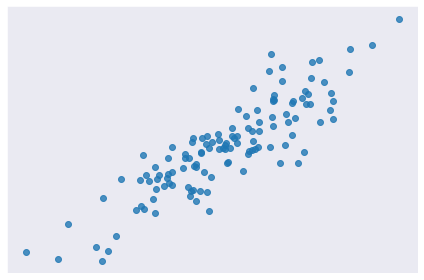

In [18]:
# linear regression drawing

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# create datasets
x, y = make_regression(n_samples = 500, n_features = 1, noise = 25, random_state = 0)

# split datasets to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# data drawing
sns.set_style('darkgrid')
sns.regplot(x_test, y_test, fit_reg=False)

# remove axis
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

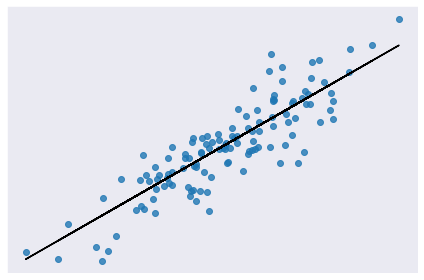

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# create datasets
x, y = make_regression(n_samples = 500, n_features = 1, noise = 25, random_state = 0)

# split datasets to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

regression = linear_model.LinearRegression()

# model training
regression.fit(x_train, y_train)

# model predict
y_predictions = regression.predict(x_test)

# drawing 
sns.regplot(x_test, y_test, fit_reg=False)
plt.plot(x_test, y_predictions, color='black')

# remove axis
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

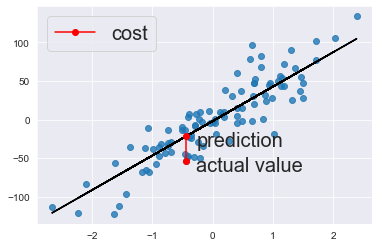

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# create datasets
x, y = make_regression(n_samples = 500, n_features = 1, noise = 25, random_state = 0)

# split datasets to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regression = linear_model.LinearRegression()

# model training
regression.fit(x_train, y_train)

y_predictions = regression.predict(x_test)

point_number = 2

x_sample = [x_test[point_number].item(), x_test[point_number].item()]
y_sample = [y_test[point_number].item(), y_predictions[point_number].item()]

sns.set_style('darkgrid')

sns.regplot(x_test, y_test, fit_reg = False)
plt.plot(x_test, y_predictions, color = 'black')
plt.plot(x_sample, y_sample, color = 'red', label = 'cost', marker = 'o')

n = ['actual value', 'prediction']

for i, txt in enumerate(n):
    plt.annotate(txt, (x_sample[i], y_sample[i]), xytext=(10, -10), textcoords = 'offset pixels', fontsize = 20)
    
plt.legend(fontsize = 20)


### 模型评价

MSE: 均方差
RMSE: 均方差根

越小越好


In [41]:
y_pred = regression.predict(x_test)

import numpy as np
from sklearn import metrics

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  521.7957351305641
RMSE 22.84284866496655


### 学习示例-鸢尾花数据集

In [50]:
from sklearn import datasets
from pandas import DataFrame, Series
import numpy as np
iris = datasets.load_iris()
iris_df = DataFrame(iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 一元线性回归

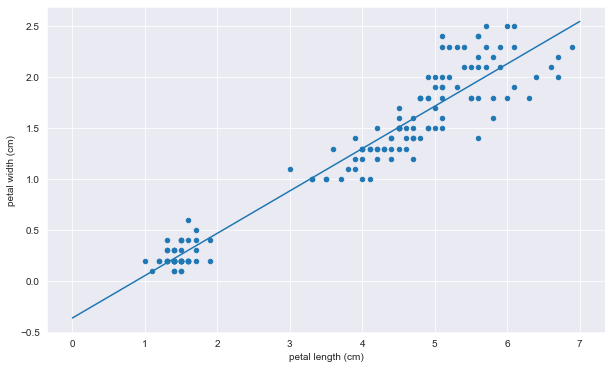

In [65]:
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
from sklearn import linear_model

lr = linear_model.LinearRegression()

lr.fit(np.c_[x], np.c_[y])

beta0, beta1 = lr.intercept_[0], lr.coef_[0][0]

iris_df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', figsize=(10, 6))

X = np.linspace(0, 7, 2)

plt.plot(X, X * beta1 + beta0)


#### 多元线性回归

In [71]:
import statsmodels.api as sm
x = iris_df[['petal length (cm)','sepal length (cm)','sepal width (cm)']]
x = sm.add_constant(x)
y = iris_df['petal width (cm)']

mlr = sm.OLS(y, x).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       petal width (cm)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           7.83e-88
Time:                        16:16:08   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2403      0.178     -1.347      0.180      -0.593       0.112
petal length (cm)     0.5241      0.024     21.399      0.000       0.476       0.572
sepal length (cm)    -0.2073      0.048     -4.363      0.000      -0.301      -0.113
sepal width (cm)      0.2228      0.049      4.553      0.000       0.126       0.320
==============================================================================
Omnibus:                        5.609   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.811
Skew:                           0.223   Prob(JB):                       0.0332
Kurtosis:                       3.944   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""